<a href="https://colab.research.google.com/github/thdgmltjd123/Assignment01/blob/master/20150711_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#구글 드라이브와 코랩 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **데이터 불러오기**

In [0]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_train.csv",names = ['x','y','z','h'])
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data_test.csv" , names = ['x','y','z','h'])

# **세타값 초기화 감잡기 plot**

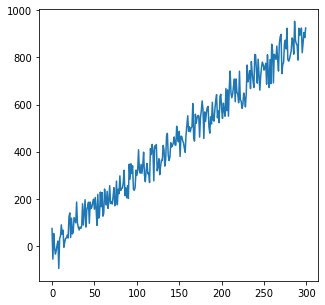

In [152]:
plt.figure(figsize=(5,5))
plt.plot(train_data.iloc[:,3])

In [0]:
#세타 값 초기화
theta0 = -2
theta1 = 2.5
theta2 = 10
theta3 = -8

# Multiple Linear Regression 구현

In [0]:
x = train_data.iloc[:,0]
y = train_data.iloc[:,1]
z = train_data.iloc[:,2]
h = train_data.iloc[:,3]

length = len(h)
fxyz = theta0 + theta1 * x + theta2 * y + theta3 * z

energy = sum((fxyz - h) ** 2) / (length * 2)

temp_energy = energy

alpha = 0.00002

theta0_val = [theta0]
theta1_val = [theta1]
theta2_val = [theta2]
theta3_val = [theta3]
energy_val = [energy]

while True:    
    gra_t0 = sum(fxyz - h) / length 
    gra_t1 = sum((fxyz - h) * x) / length
    gra_t2 = sum((fxyz - h) * y) / length
    gra_t3 = sum((fxyz - h) * z) / length
    
    theta0 -= alpha * gra_t0
    theta1 -= alpha * gra_t1
    theta2 -= alpha * gra_t2
    theta3 -= alpha * gra_t3
    
    fxyz = theta0 + theta1 * x + theta2 * y + theta3 * z
    theta0_val.append(theta0)
    theta1_val.append(theta1)
    theta2_val.append(theta2)
    theta3_val.append(theta3)

    next_energy = sum((fxyz - h) ** 2) / (length * 2)
    energy_val.append(next_energy)
    
    if(temp_energy - next_energy < 0.001):
        break
    temp_energy = next_energy

# **결과 값 시각화**

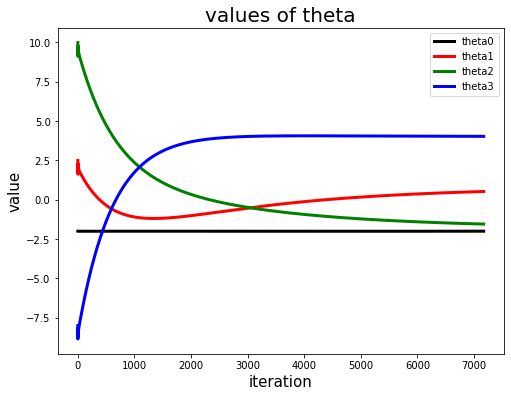

In [209]:
plt.figure(figsize = (8,6))
plt.title("values of theta",fontsize = 20)
plt.ylabel("value",fontsize = 15)
plt.xlabel("iteration",fontsize = 15)
plt.plot(theta0_val, c = "black",linewidth = 3, label = "theta0")
plt.plot(theta1_val, c = "red",linewidth = 3, label = "theta1")
plt.plot(theta2_val, c = "green",linewidth = 3, label = "theta2")
plt.plot(theta3_val, c = "blue",linewidth = 3, label = "theta3")
plt.legend(loc = 'best')
plt.show()

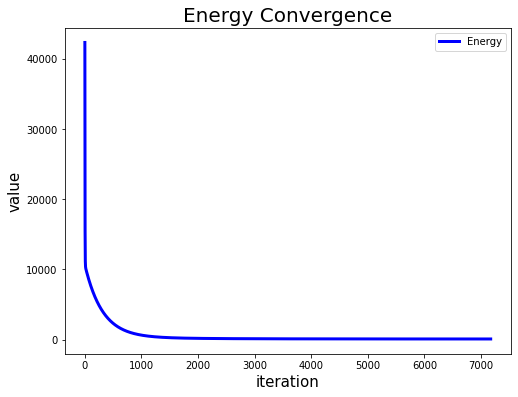

In [210]:
plt.figure(figsize = (8,6))
plt.title("Energy Convergence",fontsize = 20)
plt.ylabel("value",fontsize = 15)
plt.xlabel("iteration",fontsize = 15)
plt.plot(energy_val, c = "blue",linewidth = 3, label = "Energy")
plt.legend(loc = 'best')
plt.show()